In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape the dataset
x_train_flat = x_train.reshape(-1, 28*28) / 255.0
x_test_flat = x_test.reshape(-1, 28*28) / 255.0

# Split the data into training, validation, and test sets
x_train_comb, x_val, y_train_comb, y_val = train_test_split(x_train_flat, y_train, test_size=0.2, random_state=42, shuffle=True)

# Define the values of k to experiment with
k_values = [1, 3, 7, 12, 20, 30, 50, 75, 100]
val_accuracies = []

# Train and evaluate the k-NN classifier with different values of k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train_comb, y_train_comb)
    val_accuracy = knn_classifier.score(x_val, y_val)
    val_accuracies.append(val_accuracy)
    print("Validation accuracy for k={}: {:.4f}".format(k, val_accuracy))


Validation accuracy for k=1: 0.8487
Validation accuracy for k=3: 0.8524
Validation accuracy for k=7: 0.8539
Validation accuracy for k=12: 0.8482
Validation accuracy for k=20: 0.8427
Validation accuracy for k=30: 0.8346
Validation accuracy for k=50: 0.8243
Validation accuracy for k=75: 0.8159
Validation accuracy for k=100: 0.8083


In [9]:
# Determine the optimal value of k
optimal_k = k_values[np.argmax(val_accuracies)]
print("Optimal value of k:", optimal_k)

# Retrain the k-NN classifier with the optimal k value using the combined training and validation sets
final_classifier = KNeighborsClassifier(n_neighbors=optimal_k)
final_classifier.fit(np.concatenate((x_train_comb, x_val)), np.concatenate((y_train_comb, y_val)))

# Evaluate the final model on the test set
test_accuracy = final_classifier.score(x_test_flat, y_test)
print("Test accuracy for the final model (k={}): {:.4f}".format(optimal_k, test_accuracy))

Optimal value of k: 7
Test accuracy for the final model (k=7): 0.8540


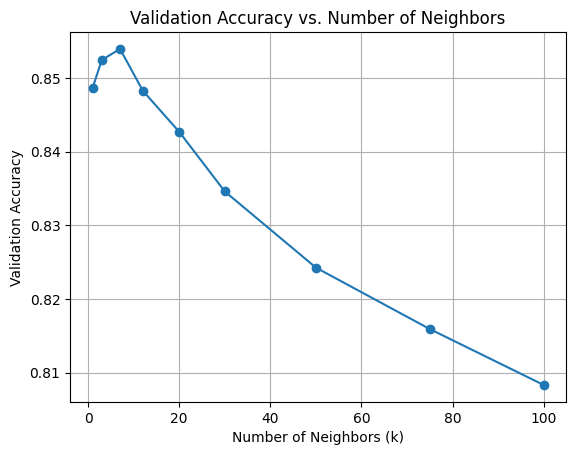

In [3]:
# Plot the validation accuracy for different values of k
plt.plot(k_values, val_accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

In [10]:
predictions = final_classifier.predict(x_test_flat)
conf_matrix = confusion_matrix(y_test, predictions)

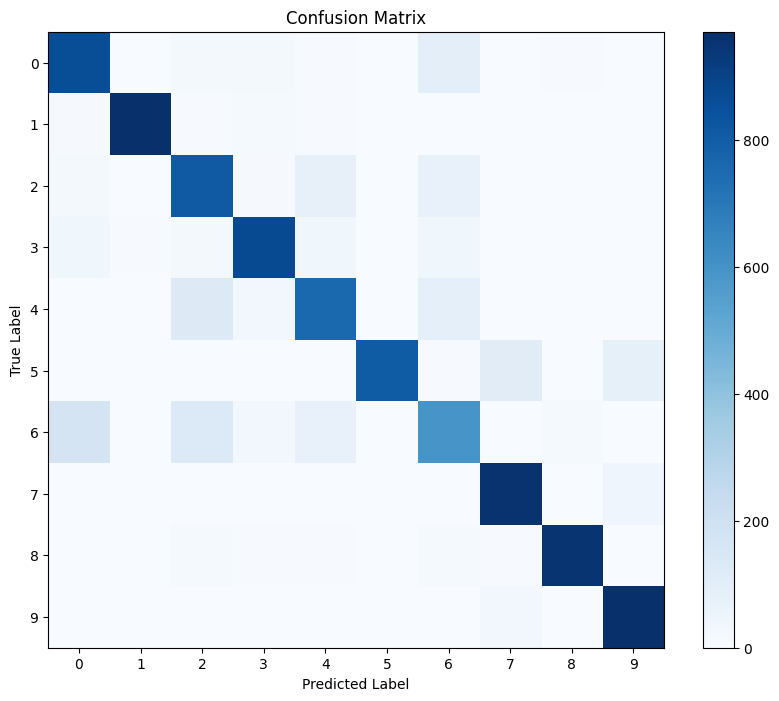

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.show()

# Analysis
Looking at the matrix we can see that class 6 has been missclassified the most and has been correctly classified the least.Classes 1,3 and 9 have been the most accurate having the lowest missclassifications. And out of all of them class 6 has been missclassified as 0 the most.